Untuk dapat memulai pengerjaan Assignment 2, saya membutuhkan beberapa Python Library seperti cv2 untuk melakukan Image Processing, numpy untuk proses pembuatan array maupun perhitungan seperti eksponensial, logaritma, akar kuadrat, dll. yang dialiaskan sebagai np, serta pyplot dari matplotlib yang digunakan untuk memvisualisasikan gambar yang dialiaskan sebagai plt.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Untuk dapat menyelesaikan soal pertama dan kedua, saya akan menggunakan gambar 1 dengan nama file 'image-1.jpg'. Gambar tersebut akan saya simpan di dalam sebuah variabel yang saya beri nama 'Image' sehingga dapat dilakukan Image Processing pada gambar tersebut. Proses penyimpanan gambar ini menggunakan fungsi 'imread' pada library cv2. 

Di sini, saya menggunakan dua parameter di dalam fungsi 'imread' yaitu yang pertama merupakan nama file dari gambar yang saya ingin gunakan dan yang kedua merupakan kode bahwa gambar yang ingin saya simpan di dalam variabel merupakan gambar grayscale. Setelah gambar disimpan di dalam variabel 'Image', selanjutnya saya mencetak ukuran gambar sebagai informasi untuk nantinya memudahkan proses filtering jika dibutuhkan.

In [2]:
image = cv2.imread('image-1.jpg', 0)
print(image.shape)

(1863, 2800)


Berdasarkan output di atas, dapat disimpulkan bahwa gambar tersebut berukuran lebar 1863 pixels dengan tinggi 2800 pixels. Selanjutnya, saya akan menampilkan spektrum FFT dari gambar tersebut dengan menggunakan fungsi 'fft.fft2' yang ada pada library numpy untuk dapat menghasilkan dua dimensi FFT. Hasil perhitungan FFT tersebut, saya simpan di dalam variabel 'f' yang kemudian akan dilakukan proses shifting dengan menggunakan fungsi 'fft.fftshift' untuk menggeser zero-frequency term ke bagian tengah. Proses pergeseran ini dilakukan dengan cara menukar kuadran pertama dan ketiga, serta kuadran kedua dan keempat. Alhasil, spektrum dari gambar akan terlihat seperti bintang dengan pusat cahaya di bagian tengah. 

In [3]:
f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)

Untuk persoalan pertama dan kedua, saya diminta untuk mengaplikasikan Gaussian Low Pass Filter dan Gaussian High Pass Filter pada sebuah gambar. Untuk itu, saya akan membuat dua fungsi untuk dapat mempermudah proses filterisasi, yaitu 'GaussianLP' untuk memberikan Low Pass Filter dan 'GaussianHP' untuk memberikan High Pass Filter. 

Baik fungsi 'GaussianLP' maupun 'GaussianHP' bisa dikatakan 99% sama. Di sini, saya meminta inputan dalam bentuk parameter berupa diameter dari filter yang disimpan dalam variabel 'radius' dan gambar yang ingin diberikan filter yang disimpan dalam variabel 'image'. Kemudian, saya membutuhkan informasi mengenai lebar dan tinggi dari gambar, sehingga saya mengambil informasi ukuran gambar dengan menggunakan '.shape' yang kemudian akan disimpan ke dalam variabel 'width' dan 'height'. Setelah itu, barulah saya dapat membuat sebuah array yang berisikan nilai 0 sebesar lebar dan tinggi dari gambar. Nantinya array ini akan berisi hasil perhitungan untuk tiap pixels yang ada pada gambar setelah menerapkan rumus Gaussian Low Pass Filter atau Gaussian High Pass Filter.

Proses selanjutnya adalah melakukan looping sebesar luas dari gambar sembari melakukan perhitungan pada setiap pixels yang ada di dalam gambar. Setelah proses perhitungan selesai dilakukan sampai ke pixels terakhir pada gambar, array yang sudah ter-update akan dikembalikan. Proses ini juga akan terjadi pada fungsi 'GaussianHP'. Lalu, apa yang membedakan antara fungsi 'GaussianLP' dan 'GaussianHP'? Yang membedakan adalah nilai yang tersimpan di dalam array. Jika pada fungsi 'GaussianLP' rumus yang digunakan adalah 'exp(- distance^2 / 2 * radius^2)', maka rumus yang digunakan pada fungsi 'GaussianHP' adalah kebalikannya atau dapat dituliskan sebagai '1 - exp(- distance^2 / 2 * radius^2)'.

In [4]:
def GaussianLP(radius, image):
    width, height = image.shape
    base = np.zeros((width, height), dtype = np.float32)

    for i in range(width):
        for j in range(height):
            distance = np.sqrt((i - width/2) ** 2 + (j - height/2) ** 2)
            base[i, j] = np.exp(- distance ** 2 / (2 * (radius ** 2)))
    
    return base

def GaussianHP(radius, image):
    width, height = image.shape
    base = np.zeros((width, height), dtype = np.float32)

    for i in range(width):
        for j in range(height):
            distance = np.sqrt((i - width/2) ** 2 + (j - height/2) ** 2)
            base[i, j] = 1 - (np.exp(- distance ** 2 / (2 * (radius ** 2))))
    
    return base

Setelah kedua fungsi selesai dibuat, proses selanjutnya cukup sederhana yaitu mengaplikasikan filter pada gambar. Proses ini dilakukan dengan cara mengalikan array yang dikembalikan dari fungsi 'GaussianLP' maupun 'GaussianHP' dengan spektrum gambar yang sudah disentralisasikan. Hasil perkalian ini akan saya simpan pada variabel 'LowPass' untuk Low Pass Filter dan 'HighPass' untuk High Pass Filter. Setelah dikalikan, proses terakhir dari pengaplikasian kedua filter ini adalah mengembalikan spektrum menjadi gambar seperti awalnya. Untuk dapat mengembalikan spektrum ke dalam bentuk gambar, saya menggunakan fungsi 'fft.ifftshift' yang berfungsi untuk melakukan desentralisasi zero-frequency term pada spektrum dan fungsi 'fft.ifft2' untuk mengubah bentuk dua dimensi FFT menjadi gambar. Huruf 'i' pada bagian depan nama fungsi 'ifftshift' dan 'ifft2' merupakan kependekan dari kata inverse yang berarti terbalik atau dibalik.

In [5]:
LowPass = fshift * GaussianLP(50, image)
LowPassFilter = np.fft.ifftshift(LowPass)
LowPassImage = np.fft.ifft2(LowPassFilter)

In [6]:
HighPass = fshift * GaussianHP(50, image)
HighPassFilter = np.fft.ifftshift(HighPass)
HighPassImage = np.fft.ifft2(HighPassFilter)

Terakhir untuk persoalan pertama dan kedua, saya akan menampilkan gambar asli, gambar yang diberikan filter Low Pass, dan gambar yang diberikan filter High Pass beserta spektrum untuk masing-masingnya sehingga dapat dibandingkan. Proses visualisasi keenam hal ini membutuhkan bantuan dari library matplotlib.pyplot.

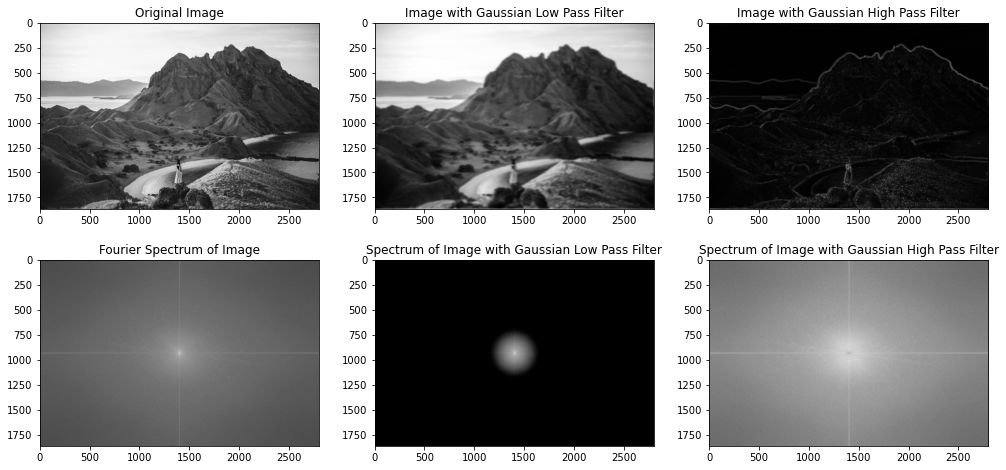

In [7]:
plt.figure(figsize = (17, 8))

plt.subplot(231)
plt.title('Original Image')
plt.imshow(image, cmap = 'gray')

plt.subplot(234)
plt.title('Fourier Spectrum of Image')
plt.imshow(1 + np.log(np.abs(fshift)), cmap = 'gray')

plt.subplot(232)
plt.title("Image with Gaussian Low Pass Filter")
plt.imshow(np.abs(LowPassImage), "gray")

plt.subplot(235)
plt.title('Spectrum of Image with Gaussian Low Pass Filter')
plt.imshow(np.log(1 + np.abs(LowPass)), cmap = 'gray')

plt.subplot(233)
plt.title("Image with Gaussian High Pass Filter")
plt.imshow(np.abs(HighPassImage), "gray")

plt.subplot(236)
plt.title('Spectrum of Image with Gaussian High Pass Filter')
plt.imshow(np.log(1 + np.abs(HighPass)), cmap = 'gray')

plt.show()

Dengan demikian, persoalan pertama dan kedua sudah selesai. Selanjutnya, saya akan beralih pada persoalan ketiga. Untuk dapat menyelesaikan soal ketiga, saya akan menggunakan gambar 2 dengan nama file 'image-2.png'. Gambar tersebut akan saya simpan di dalam sebuah variabel yang saya beri nama 'noisyImage' sehingga dapat dilakukan Image Processing pada gambar tersebut. Proses penyimpanan gambar ini menggunakan fungsi 'imread' pada library cv2. 

Di sini, saya masih menggunakan dua parameter di dalam fungsi 'imread' yaitu yang pertama merupakan nama file dari gambar yang saya ingin gunakan dan yang kedua merupakan kode bahwa gambar yang ingin saya simpan di dalam variabel merupakan gambar grayscale. Setelah gambar disimpan di dalam variabel 'noisyImage', selanjutnya saya mencetak ukuran gambar sebagai informasi untuk nantinya memudahkan proses filtering jika dibutuhkan.

In [8]:
noisyImage = cv2.imread('image-2.png', 0)
print(noisyImage.shape)

(320, 240)


Proses awal dari soal ketiga ini masih sama seperti dua soal sebelumnya, dimana saya akan menampilkan spektrum FFT dari gambar tersebut dengan menggunakan fungsi 'fft.fft2' yang ada pada library numpy untuk dapat menghasilkan dua dimensi FFT. Hasil perhitungan FFT tersebut, saya simpan di dalam variabel 'fn' yang kemudian akan dilakukan proses shifting dengan menggunakan fungsi 'fft.fftshift' untuk menggeser zero-frequency term ke bagian tengah.

In [9]:
fn = np.fft.fft2(noisyImage)
fnshift = np.fft.fftshift(fn)

Setelah spektrum gambar sudah terbentuk, barulah kemudian saya membuat sebuah fungsi untuk dapat mengaplikasikan Butterworth Notch Filter. Untuk persoalan ketiga, saya diminta untuk mengurangi atau mereduksi periodic noise pada gambar dengan menggunakan Butterworth Notch Filter. Untuk itu, saya akan membuat sebuah fungsi untuk dapat mempermudah proses noise reduction, yang saya beri nama 'ButterworthNotchFilter'

Pada fungsi tersebut, saya meminta inputan dalam bentuk parameter berupa diameter dari filter yang disimpan dalam variabel 'radius', gambar yang ingin diberikan filter yang disimpan dalam variabel 'image', serta dua titik koordinat dari nilai frekuensi yang nantinya akan direduksi yang disimpan dalam variabel 'point1' dan 'point2'. Sama seperti fungsi 'GaussianLP' dan 'GaussianLP', di sini saya juga membutuhkan informasi mengenai lebar dan tinggi dari gambar, sehingga saya mengambil informasi ukuran gambar terlebih dahulu dengan menggunakan '.shape' yang kemudian akan disimpan ke dalam variabel 'width' dan 'height'. Setelah itu, barulah saya membuat sebuah array yang berisikan nilai 0 sebesar lebar dan tinggi dari gambar. Nantinya array ini akan berisi hasil perhitungan untuk tiap pixels yang ada pada gambar setelah menerapkan perhitungan dan pembandingan jarak.

Proses selanjutnya adalah melakukan looping sebesar luas dari gambar sembari melakukan perhitungan pada setiap pixels yang ada di dalam gambar. Setelah proses perhitungan selesai dilakukan sampai ke pixels terakhir pada gambar, akan dilakukan perbandingan antara hasil yang dihitung dengan diameter yang diameter yang sudah disimpan pada variabel 'radius' di parameter. Jika hasil perhitungan kurang dari sama dengan diameter, maka nilai array pada koordinat tersebut akan diubah menjadi 0. Sementara kebalikannya, maka nilai array pada koordinat tersebut akan diubah menjadi 1. Array yang sudah ter-update inilah yang nantinya akan dikembalikan.

In [10]:
def ButterworthNotchFilter(radius, image, point1, point2):
    width, height = image.shape
    base = np.zeros((width, height), dtype = np.float32)

    for i in range(0, width):
        for j in range(0, height):
            dist1 = np.sqrt((i - width/2 + point1) ** 2 + (j - height/2 + point2) ** 2)
            dist2 = np.sqrt((i - width/2 - point1) ** 2 + (j - height/2 - point2) ** 2)

            if dist1 <= radius or dist2 <= radius:
                base[i, j] = 0.0
            else:
                base[i, j] = 1.0
                
    return base

Berdasarkan spektrum pada gambar asli, dapat disimpulkan ada enam titik yang merupakan 'peaks' yang harus direduksi untuk dapat mengurangi periodic noise pada gambar. Untuk itu, saya melakukan eksperimen terkait titik-titik koordinat untuk keenam 'peaks' yang ada dan didapatkan tiga koordinat yaitu [60, 0], [120, 0], dan [145, 0]. Mengapa titik koordinat ini hanya 3 sementara 'peaks' pada spektrum ada 6? Hal ini dikarenakan nilai 0 pada spektrum berada di tengah dan ketiga titik koordinat tersebut apabila diaplikasikan pada gambar akan langsung menunjuk pada dua titik yaitu di sekitar atas titik tengah dan di sekitar bawah titik tengah. Sederhananya, titik tengah spektrum merupakan titik (0, 0) dan titik koordinat yang ada akan langsung merujuk pada koordinat positif dan negatif, sehingga penerapan titik koordinat (60, 0) pada fungsi akan langsung merujuk pada koordinat (60, 0) dan (-60, 0).

Untuk ketiga koordinat tersebut, saya melakukan filtering menggunakan fungsi 'ButterworthNotchFilter' yang kemudian disimpan dalam tiga variabel berbeda yaitu 'Noisy1', 'Noisy2', dan 'Noisy3'. Kemudian, ketiga filter ini akan dikalikan satu sama lain menjadi sebuah filter utuh, yang selanjutnya juga akan dikalikan dengan spektrum gambar untuk dapat mengaplikasikan filter pada gambar. Proses terakhir dari pengaplikasian filter ini adalah mengembalikan spektrum menjadi gambar seperti awalnya dengan menggunakan fungsi 'fft.ifftshift' yang berfungsi untuk melakukan desentralisasi zero-frequency term pada spektrum dan fungsi 'fft.ifft2' untuk mengubah bentuk dua dimensi FFT menjadi gambar.

In [11]:
Noisy1 = ButterworthNotchFilter(6, noisyImage, 60, 0)
Noisy2 = ButterworthNotchFilter(4, noisyImage, 120, 0)
Noisy3 = ButterworthNotchFilter(2, noisyImage, 145, 0)

Filter = Noisy1 * Noisy2 * Noisy3
RejectNoise = fnshift * Filter
RejectNoiseFilter = np.fft.ifftshift(RejectNoise)
RejectNoiseImage = np.fft.ifft2(RejectNoiseFilter)

Terakhir, saya akan menampilkan gambar asli dan gambar yang sudah direduksi beserta spektrum untuk masing-masingnya sehingga dapat dibandingkan. Proses visualisasi keempat hal ini membutuhkan bantuan dari library matplotlib.pyplot.

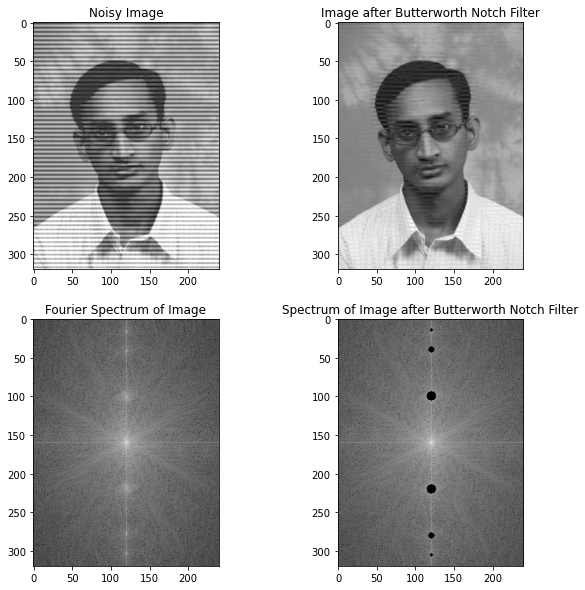

In [12]:
plt.figure(figsize = (10, 10))

plt.subplot(221)
plt.title('Noisy Image')
plt.imshow(noisyImage, cmap = 'gray')

plt.subplot(223)
plt.title('Fourier Spectrum of Image')
plt.imshow(1 + np.log(np.abs(fnshift)), cmap = 'gray')

plt.subplot(222)
plt.title("Image after Butterworth Notch Filter")
plt.imshow(np.abs(RejectNoiseImage), "gray")

plt.subplot(224)
plt.title('Spectrum of Image after Butterworth Notch Filter')
plt.imshow(np.log(np.abs(fnshift)) * Filter, cmap = 'gray')

plt.show()